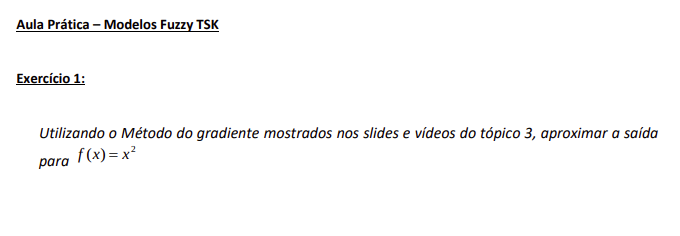

#### A solução exige uso de gaussianas. 
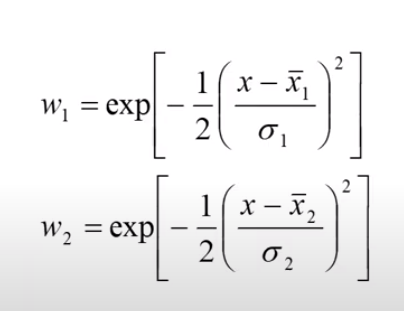

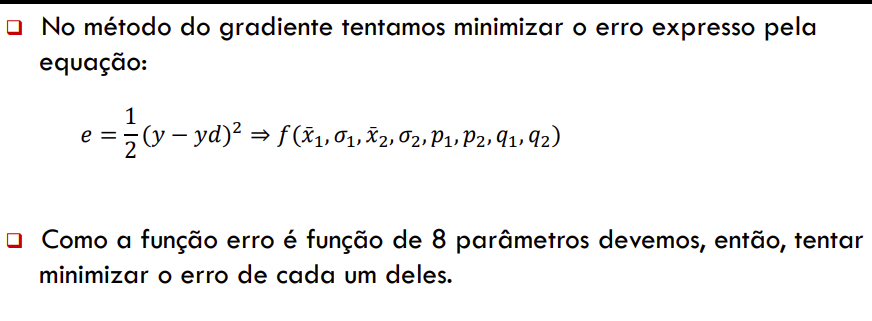

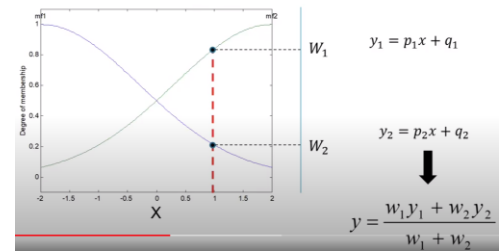

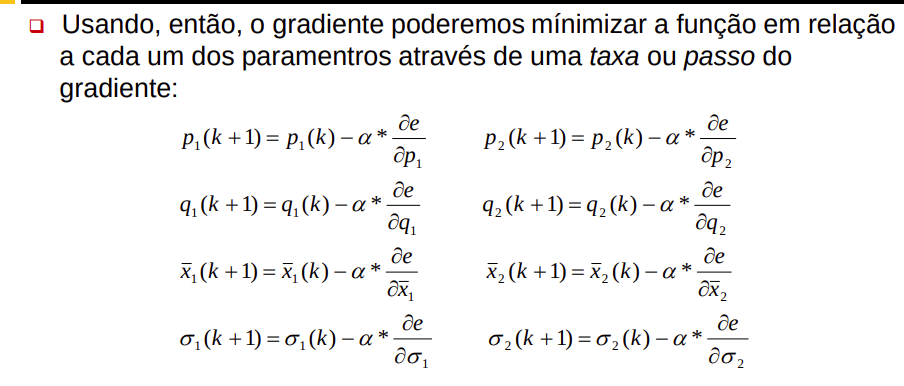

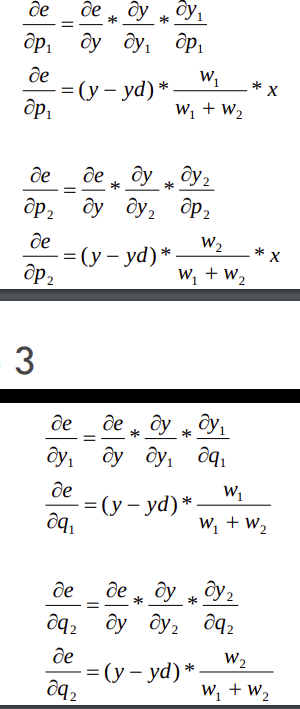


### Derivada do erro em relação aos parâmetros

In [33]:

def Dp1(y, yd, w1, w2,x):
    return (y-yd) * x * w1 / (w1 + w2)


def Dp2(y, yd, w1, w2,x):
    return (y-yd) * x * w2 / (w1 + w2)


def Dpq1(y, yd, w1, w2,x):
    return (y-yd) * w1 / (w1 + w2)

def Dpq2(y, yd, w1, w2,x):
    return (y-yd) * w2 / (w1 + w2)

def Dpx1_bar(y, yd, w1, w2, x, y1, y2, x1_bar, sd1):
    return (y-yd) * w2 * ((y1 - y2)/((w1 + w2)**2)) * w1 *((x - x1_bar)/sd1**2)                                            

def Dpx2_bar(y, yd, w1, w2, x, y1, y2, x2_bar, sd2):
    return (y-yd) * w1 * ((y2 - y1)/(w1 + w2)**2) * w2 *((x - x2_bar)/sd2**2)

def Dpsd1(y, yd, w1, w2, x, y1, y2, x1_bar, sd1):
    return (y-yd) * w2 * ((y1 - y2)/(w1 + w2)**2) * w1 *((x - x1_bar)**2/sd1**3)

def Dpsd2(y, yd, w1, w2, x, y1, y2, x2_bar, sd2):
    return (y-yd) * w1 * ((y2 - y1)/(w1 + w2)**2) * w2 *((x - x2_bar)**2/sd2**3)

### Testes das funções que calculam a derivada

In [41]:

dp1 = Dp1(y=1,yd=2,w1=3,w2=4,x=5)

if(round(dp1,11)!=-2.14285714286):
    print("Erro em dp1")
    print(round(dp1,11))

    
dp2 = Dp2(y=1,yd=2,w1=3,w2=4,x=5)

if(round(dp2,11)!=-2.85714285714):
    print("Erro em dp2")
    print(round(dp2,11))

dpq1 = Dpq1(y=1,yd=2,w1=3,w2=4,x=5)

if(round(dpq1,11)!=-0.42857142857):
    print("Erro em Dpq1")
    print(round(dpq1,11))
 

dpq2 = Dpq2(y=1,yd=2,w1=3,w2=4,x=5)

if(round(dpq2,11)!=-0.57142857143):
    print("Erro em Dpq2")
    print(round(dpq2,11))

    
dpx1_bar = Dpx1_bar(y=1,yd=2,w1=3,w2=4,x=5,y1=6, y2=7, x1_bar=8, sd1=9)

if(round(dpx1_bar,11)!=-0.00907029478):
    print("Erro em dpx1_bar")
    print(round(dpx1_bar,11))
    

dpx1_bar = Dpx1_bar(y=1,yd=2,w1=3,w2=4,x=5,y1=6, y2=7, x1_bar=8, sd1=9)

if(round(dpx1_bar,11)!=-0.00907029478):
    print("Erro em dpx1_bar")
    print(round(dpx1_bar,11))
        
dpx2_bar = Dpx2_bar(y=1,yd=2,w1=3,w2=4,x=5,y1=6, y2=7, x2_bar=8, sd2=9)

if(round(dpx2_bar,11)!=0.00907029478):
    print("Erro em dpx2_bar")
    print(round(dpx2_bar,11)) 
    
   
dpsd1 = Dpsd1(y=1,yd=2,w1=3,w2=4,x=5,y1=6, y2=7, x1_bar=8, sd1=9)

if(round(dpsd1,11)!=0.00302343159):
    print("Erro em Dpsd1")
    print(round(dpsd1,11))

dpsd2 = Dpsd2(y=1,yd=2,w1=3,w2=4,x=5,y1=6, y2=7, x2_bar=8, sd2=9)

if(round(dpsd2,11)!=-0.00302343159):
    print("Erro em Dpsd2")
    print(round(dpsd2,11))

### Estimar Curva

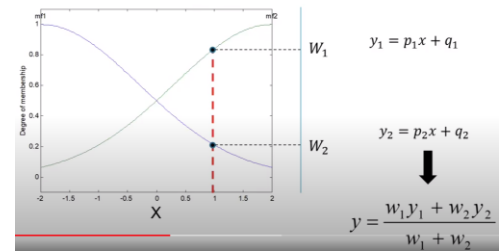

In [36]:
#Equações das curvas
import math 

def DoGaussian(x, mean, sd ):
  w = (x - mean)/ sd
  w =  w**2
  w =  -0.5*w
  w =  math.exp(w)
  return w

def DoY1(p1,x, q1):
    return p1 *x + q1

def DoY2(p2,x, q2):
    return p2 *x + q2

def DoY(w1,y1,w2,y2):
    return (w1*y1 + w2*y2)/(w1 + w2)

def Initial_sd(mean,numberOfPoints,points):
    serie = 0
    for i in range(numberOfPoints):
        serie = serie + (points[i] - mean)**2
    sd = math.sqrt(serie/numberOfPoints)
    return sd


###  Testes das equações das curvas

In [38]:
doGaussian = DoGaussian(x=1, mean=2, sd=3)
if(round(doGaussian,11)!=0.94595946891):
    print("Erro em DoGaussian")
    print(round(doGaussian,11))

doY1 = DoY1(p1=1,x=2, q1=3)
if(round(doY1,11)!=5):
    print("Erro em DoY1")
    print(round(doY1,11))   
 

doY2 = DoY2(p2=1,x=2, q2=3)
if(round(doY2,11)!=5):
    print("Erro em DoY2")
    print(round(doY2,11))   
    

doY = DoY(w1=1,y1=2,w2=3,y2=4)  
if(round(doY,11)!=3.5):
    print("Erro em DoY")
    print(round(doY,11))
    
initial_sd = Initial_sd(mean=1.68, numberOfPoints=3,points=[1.55,1.70,1.80])  
if(round(initial_sd,11)!=0.10279429297):
    print("Erro em Initial_sd")
    print(round(initial_sd,11))
    
    

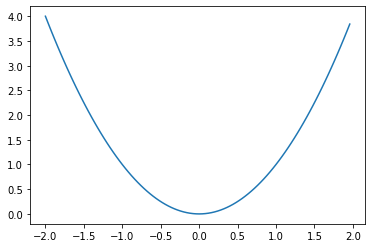

In [101]:
##Criar array com 1000 posições Para Plotar Função Quadrática

import numpy as np
import matplotlib.pyplot as plt

x = -2
y = x**2
arrayX = [x]
arrayY = [y]
RANGE = 100
STEPS = 0.04

#Array com 1000 pontos entre -2 e 2
for i in range(1,RANGE):
    x = x + STEPS
    arrayX.append(x)  
    
       
#calculando a funcao para cada ponto

for i in range(1,RANGE):
    y = (arrayX[i])**2
    arrayY.append(y)

    

xpoints = np.array(arrayX) 
ypoints = np.array(arrayY)


plt.plot(xpoints, ypoints)
plt.show()



In [ ]:
##Criar array com 1000 posições Para Plotar Função Gaussiana

In [ ]:
###Pra onde ir agora? 
### plotar outra gaussiana em que intervalo? IMPORTANTE
### aleatorizar o vetor e coletar pontos neste intervalo e calcular os pontos?

##os constants p1 e q1, p2 e q2 eu defino como. 

### Plotar Gaussiana

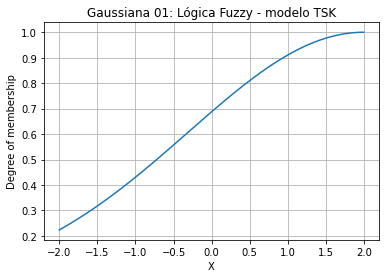

In [64]:
import math   # This will import math module
import numpy as np #https://www.geeksforgeeks.org/how-to-plot-a-normal-distribution-with-matplotlib-in-python/
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics


#Plote duas gaussians
#def doGaussian(x, mean, sd )


RANGE = 4
FROM=-2
TO = 2
NUMBER_OF_POINTS = 1000
STEPS = RANGE/NUMBER_OF_POINTS

# Plot between -2 and 2 with .004 steps.
x_axis = np.arange(FROM, TO, STEPS)
y_axis = [] 
# Calculating mean and standard deviation
#mean = statistics.mean(x_axis)
#sd = statistics.stdev(x_axis)

# Calculating mean and standard deviation
mean = 2
sd = Initial_sd(mean, NUMBER_OF_POINTS,x_axis)  


for i in range(len(x_axis)):
    y = DoGaussian(x_axis[i], mean, sd)
    y_axis.append(y)
    
plt.plot(x_axis,y_axis)

plt.title("Gaussiana 01: Lógica Fuzzy - modelo TSK")
plt.xlabel("X")
plt.ylabel("Degree of membership")

plt.grid()

plt.show()



    
       



In [62]:
print(y_axis)

[0.22363218182388822, 0.22430274158122318, 0.22497463809425547, 0.22564787133586053, 0.22632244126680265, 0.22699834783569822, 0.22767559097898077, 0.228354170620865, 0.22903408667331096, 0.22971533903598934, 0.2303979275962454, 0.23108185222906394, 0.2317671127970339, 0.23245370915031374, 0.23314164112659552, 0.23383090855107078, 0.23452151123639486, 0.2352134489826527, 0.23590672157732398, 0.23660132879524814, 0.23729727039859022, 0.23799454613680604, 0.23869315574660846, 0.23939309895193206, 0.24009437546390014, 0.24079698498078952, 0.24150092718799737, 0.24220620175800694, 0.24291280835035345, 0.24362074661159108, 0.24433001617525854, 0.24504061666184623, 0.24575254767876226, 0.24646580882029961, 0.24718039966760227, 0.2478963197886328, 0.2486135687381389, 0.24933214605762036, 0.2500520512752966, 0.2507732839060737, 0.2514958434515118, 0.2522197293997927, 0.25294494122568734, 0.25367147839052345, 0.25439934034215356, 0.255128526514923, 0.2558590363296373, 0.2565908691935312, 0.2573